In [1]:
import json
import smbus

import pandas as pd
import matplotlib.pyplot as plt

from meerkat import mcp9808, parser

In [2]:
i2c = smbus.SMBus(1)

In [3]:
mcp = mcp9808.MCP9808(bus=i2c)

In [4]:
mcp.get_status()
mcp.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


In [5]:
mcp.get_temp()

23.375

In [6]:
print(mcp.device.to_json(indent=4))

{
    "accuracy": "+/-0.25 (typical) C",
    "active": null,
    "bus": "<SMBus object at 0x7396b230>",
    "calibration_date": null,
    "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor",
    "dtype": null,
    "error": null,
    "manufacturer": "Microchip",
    "name": "MCP9808",
    "precision": "0.0625 C maximum",
    "state": null,
    "units": "Degrees Celcius",
    "urls": "https://www.microchip.com/datasheet/MCP9808",
    "version_hw": "0.1",
    "version_sw": "0.1"
}


In [7]:
print(mcp.writer.to_json(indent=4))

{
    "accuracy": null,
    "bytes": null,
    "case_sensitive_header": false,
    "comment": "#",
    "delimiter": ",",
    "description": null,
    "device": {
        "accuracy": "+/-0.25 (typical) C",
        "active": null,
        "bus": "<SMBus object at 0x7396b230>",
        "calibration_date": null,
        "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor",
        "dtype": null,
        "error": null,
        "manufacturer": "Microchip",
        "name": "MCP9808",
        "precision": "0.0625 C maximum",
        "state": null,
        "units": "Degrees Celcius",
        "urls": "https://www.microchip.com/datasheet/MCP9808",
        "version_hw": "0.1",
        "version_sw": "0.1"
    },
    "double_quote": true,
    "dtypes": null,
    "encoding": "utf-8",
    "escape_char": "\\",
    "format": null,
    "hash": null,
    "header": [
        "sample_id",
        "temperature_C"
    ],
    "licenses": null,
    "line_terminator": "\n",
    "me

In [8]:
samples = 20

In [9]:
data = []
for _ in range(samples):
    data.append(mcp.get(sid='mcp9808_test_' + str(_)))

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame(data, columns=['sid', 'temperature_C'])

In [12]:
df.head()

,sid,temperature_C
0,mcp9808_test_0,23.4375
1,mcp9808_test_1,23.4375
2,mcp9808_test_2,23.4375
3,mcp9808_test_3,23.4375
4,mcp9808_test_4,23.4375


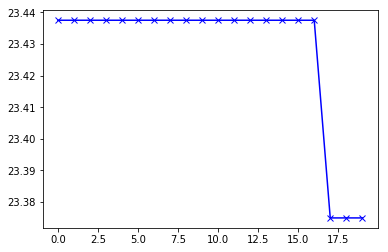

In [13]:
df.temperature_C.plot(style='-xb');

### File Save Test
Ambient temperature is approximately 23 degrees C

In [14]:
samples = 20

In [15]:
for _ in range(samples):
    mcp.write(sid='sample_' + str(_))

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from meerkat import parser

In [17]:
mcp.writer.path

'2018_12_27_18_49_24_data.csv'

In [18]:
m, df = parser.csv_resource(mcp.writer.path)

In [19]:
df.head()

,std_time_ms,sample_id,temperature_C
0,2018-12-27 18:49:24.868326,sample_0,23.4375
1,2018-12-27 18:49:24.869860,sample_1,23.4375
2,2018-12-27 18:49:24.871084,sample_2,23.4375
3,2018-12-27 18:49:24.872313,sample_3,23.4375
4,2018-12-27 18:49:24.873616,sample_4,23.4375


In [20]:
m

{'accuracy': None,
 'bytes': None,
 'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'description': None,
 'device': {'accuracy': '+/-0.25 (typical) C',
  'active': None,
  'bus': '<SMBus object at 0x7396b230>',
  'calibration_date': None,
  'description': '+/-0.5 degrees Celcius maximum accuracy digital temperature sensor',
  'dtype': None,
  'error': None,
  'manufacturer': 'Microchip',
  'name': 'MCP9808',
  'precision': '0.0625 C maximum',
  'state': None,
  'units': 'Degrees Celcius',
  'urls': 'https://www.microchip.com/datasheet/MCP9808',
  'version_hw': '0.1',
  'version_sw': '0.1'},
 'double_quote': True,
 'dtypes': None,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': None,
 'hash': None,
 'header': ['sample_id', 'temperature_C'],
 'licenses': None,
 'line_terminator': '\n',
 'media_type': 'text/csv',
 'name': 'MCP9808',
 'null_sequence': 'NA',
 'path': '2018_12_27_18_49_24_data.csv',
 'precision': None,
 'quote_char': '"',
 'schema': None,
 'sheban

In [21]:
df['datetime64_ns'] = pd.to_datetime(df[mcp.writer._timepiece.format_used])

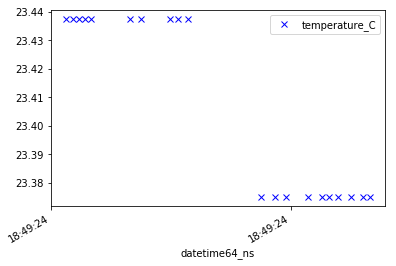

In [22]:
df[['datetime64_ns', 'temperature_C']].plot(x='datetime64_ns', style='xb');